**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation)

**Lectures:** [365datascience](https://www.udemy.com/course/the-supervised-machine-learning-course/learn/lecture/33664506?start=15#overview)

# **Regularization Algorithms**
[Regularization](https://www.youtube.com/watch?v=QjOILAQ0EFg): regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting

[**Ridge**](https://en.wikipedia.org/wiki/Ridge_regression):
is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

**pros:** works with smaller datasets

<br>


[**Lasso**](https://en.wikipedia.org/wiki/Lasso_(statistics)):In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

**pros:** Lasso performs feature selection

#### **Task:**   
This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

### **Dataset available on:** [Kaggle Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  , [IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

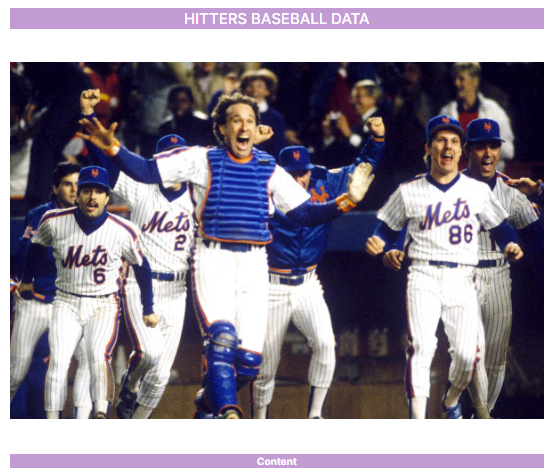

#### **Import library**:

In [1]:
import pandas as pd # for wrangling
import numpy as np # for scientific computing
import math # for mathematical operations
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for more advanced statistical and beautiful visualisation
sns.set()

from sklearn.preprocessing import StandardScaler # standardscaler

from sklearn.linear_model import LinearRegression # linear regression
from sklearn.linear_model import RidgeCV # ridge regression
from sklearn.linear_model import LassoCV # lasso regression

from sklearn.model_selection import RepeatedKFold # cross validation
from sklearn.model_selection import train_test_split # splitting the data

from sklearn.metrics import mean_absolute_error, mean_squared_error # error metrics
%matplotlib inline

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
data = pd.read_csv('/content/Hitters.csv')
df_hitters = data.copy() # create a copy of the dataset

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
df_hitters.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# show the column names
df_hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [5]:
# shape of the data
df_hitters.shape

(322, 20)

In [6]:
# check for missing values
df_hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

**Note:**  if you see Salary has 59 missing values

In [7]:
# check data types
df_hitters.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

#### Let's explore the object datatypes:

In [8]:
# categorical variables
print('The league types are:', df_hitters['League'].unique())
print('The division types are:', df_hitters['Division'].unique())
print('The new league options are:', df_hitters['NewLeague'].unique())

The league types are: ['A' 'N']
The division types are: ['E' 'W']
The new league options are: ['A' 'N']


#### **let dive into the a bit of exploratory about the categorical values:**

In [9]:
# value count of league
df_hitters['League'].value_counts(normalize = True)

A    0.543478
N    0.456522
Name: League, dtype: float64

In [10]:
# value count of league
df_hitters['Division'].value_counts(normalize = True)

W    0.512422
E    0.487578
Name: Division, dtype: float64

In [11]:
# value count of new League
df_hitters['NewLeague'].value_counts(normalize = True)

A    0.546584
N    0.453416
Name: NewLeague, dtype: float64

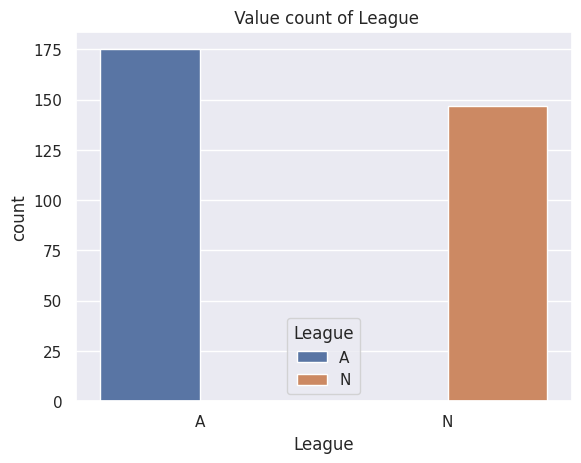

In [12]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=df_hitters, x='League', hue='League').set(title = " Value count of League");
#sns.countplot(data=df_hitters, x='Division', hue='Division').set(title = " Value count of Division");
#sns.countplot(data=df_hitters, x='NewLeague', hue='NewLeague').set(title = " Value count of NewLeague");

## **Preprocessing and feature engineering:**

In [13]:
# get dummies variables of the object variables
df_hitters_num = pd.get_dummies(df_hitters, columns=['League', 'Division', 'NewLeague'], drop_first=True)

In [14]:
# run the dummies dataframe
df_hitters_num.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1


#### **Remember we had couple of missing datas in the salary columns now let's handle them.**

In [15]:
# drop na in the dataFrame
df_hitters_num_nonnull = df_hitters_num.dropna()

In [16]:
# run non null dummies dataset
print("Now we have a clean dataframe:")
df_hitters_num_nonnull.isnull().sum()

Now we have a clean dataframe:


AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

#### Since we will be predicting **Salaries** let's dive into a bit of descriptive stats:

In [17]:
# summary stat of the Salary
df_hitters_num_nonnull['Salary'].describe()

count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

#### Distribution plot:

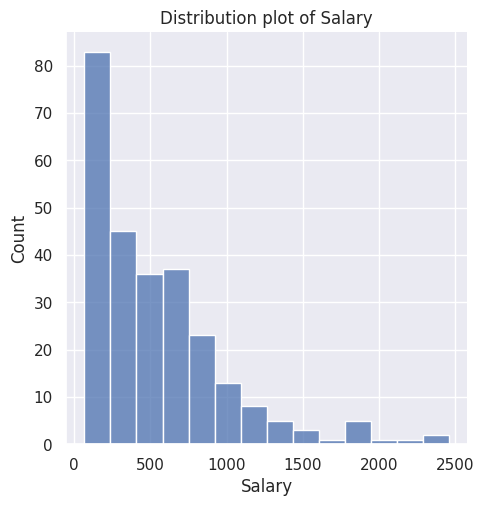

In [18]:
# distribution plot
sns.displot(df_hitters_num_nonnull['Salary']).set(title='Distribution plot of Salary');

####  Correlation plot:

In [19]:
correlation = df_hitters_num_nonnull.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

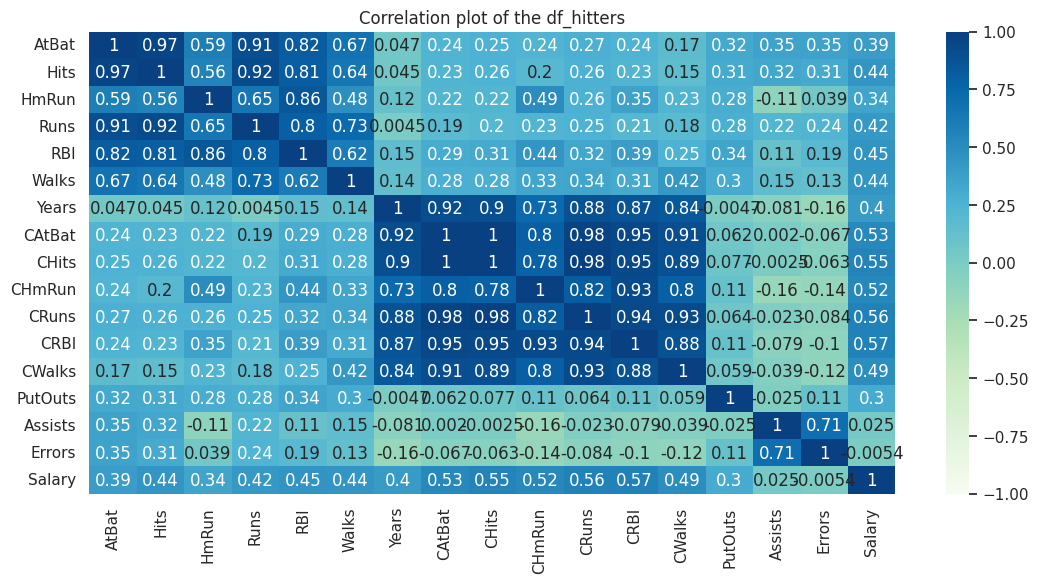

In [20]:
# calculate the correlation matrix
"""Note: this code will actually display the full code with all the variables"""
plt.figure(figsize=(13,6))

# plot the heatmap by selecting only numeric columns in the df_hitters dataFrame
sns.heatmap(df_hitters._get_numeric_data().corr(),
            vmin = -1,
            vmax = 1,
            cmap = 'GnBu',
            annot = True)
plt.title('Correlation plot of the df_hitters')
plt.show();

### **Declare the dependent and independent variable:**

In [21]:
X = df_hitters_num_nonnull.drop('Salary', axis = 1) # dependent/input variables
y = df_hitters_num_nonnull['Salary'] # independent/target variables

### **Split the data into train and test set:**

In [22]:
# this function takes in the dataset encode it and train_split the values Telco_Customer_churn_new
def split(X,y):


    # train_test split
    X_train, X_test, y_train, y_test = train_test_split(X, # independent or x values
                                                    y, # dependent or x values
                                                    test_size = 0.35, # split the data into 65% training set and 35% test set
                                                    random_state = 365, # for reproducibility
                                                      )

    return X_train, X_test, y_train, y_test


In [23]:
#run the split function
X_train, X_test, y_train, y_test = split(X,y)

#### **Standardize the dataset:**

In [24]:
# instantiate the standard scaler object
scaler = StandardScaler()
# apply the .fit_transform method
X_train = scaler.fit_transform(X_train)
# apply the scale metrics calculated from the training set
X_test = scaler.transform(X_test)

### **Perform linear regression:**

In [25]:
lin_reg_model =  LinearRegression() # instantiate the linear regression object
lin_reg_model.fit(X_train, y_train) # fit the training data to the linear model

LinearRegression()

In [26]:
print("Linear Regression coefficients are: ", lin_reg_model.coef_) # print the coeffients
print("\n\nLinear Regression y-intercept is: ", lin_reg_model.intercept_) # the y-intercepts

Linear Regression coefficients are:  [-216.58725574  176.6665394    26.42174341  -32.30723397    3.50396442
  114.47871878  -38.27993316 -900.68020534  836.55817419   28.55520441
  405.6848943    64.99526588 -187.22476547  115.53995185   68.62131273
  -13.90111177   58.90973857  -81.77905186  -35.02755069]


Linear Regression y-intercept is:  532.2961176470588


#### **predict the variables:**

In [27]:
lin_reg_y_pred = lin_reg_model.predict(X_test)
lin_reg_y_pred

array([ 415.45782829,  432.20780272,  758.78349674,  799.00336712,
        350.20586478,  294.0659682 ,  184.24872446,  464.67402835,
       1108.05429466,  556.19984654,  488.06923001,  473.30471499,
        839.99519038,  751.59519044,  220.43742205,  320.16591592,
        340.14473675,  710.61012663,  170.8874789 ,  651.78620649,
        827.41281464,  196.71008612,  573.1185691 , 1172.76382687,
       1282.0883485 , 1594.28681356,  777.07655701, 1094.24965368,
        556.76207246, 1107.0708847 ,  477.61394579,  297.87571483,
        361.26177051,  503.18848321,  189.99424369,  241.50466799,
        248.98173212,  942.76631923,  617.30294655,  225.25956752,
        323.42092736,  455.93050456,  871.9585369 ,  379.23514877,
        620.49084963,  281.78622042,  566.78476943,  589.94187243,
        662.63913511,  545.01484672, 2012.42953081,  737.55139652,
        380.02427287,  443.3775693 , 1076.912394  ,  710.95238727,
        556.2946056 ,   68.23384264,  209.15575371,  195.57359

**Now let's compare ground truth vs predicted values:**

In [28]:
# create the dataFrame
linear_compare = pd.DataFrame({'Predicted':lin_reg_y_pred, 'Actual':y_test})
linear_compare

,Predicted,Actual
14,415.457828,240.0
181,432.207803,737.5
177,758.783497,1300.0
124,799.003367,737.5
277,350.205865,475.0
...,...,...
303,422.501932,425.0
264,383.905451,250.0
31,115.778511,110.0
204,315.352309,780.0


**[Metrics](https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be) of the linear regression:**

In [29]:
print("Linear Regression Model RMSE is:", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Linear Regression Model Training Score:",lin_reg_model.score(X_train, y_train))
print("Linear Regression Model Testing Score:",lin_reg_model.score(X_test, y_test))

Linear Regression Model RMSE is: 313.2395678994064
Linear Regression Model Training Score: 0.568058916051897
Linear Regression Model Testing Score: 0.3455994829736325


## **Cross-validation for Choosing a Tuning Parameter:**

### **Ridge regression:**

In [30]:
# instantiate the cross-validation object
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [31]:
# instantiate the ridge regressor
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_squared_error')

In [32]:
%%time
ridge.fit(X_train, y_train) # fit the training set
ridge_reg_y_pred = ridge.predict(X_test) # store the predicted values in the variable ridge_reg_y_pred

CPU times: user 3.32 s, sys: 24.4 ms, total: 3.34 s
Wall time: 3.45 s


In [33]:
print('\nRidge tuning parameter:', (ridge.alpha_))
print('\nRidge model coefficients:', (ridge.coef_))
print('\nRidge model intercept:', (ridge.intercept_))


Ridge tuning parameter: 9.9

Ridge model coefficients: [ -99.64056512   87.85475144   -3.70978058   22.50316688   18.34973213
   68.1928924   -55.21554926   -5.93096462  127.21511684   21.56457876
  129.7438877    93.22509485 -102.97057988  116.56925232   31.19052366
  -10.05599857   39.05110375  -80.7269112   -22.53792401]

Ridge model intercept: 532.2961176470588


**[Metrics](https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be) of the Ridge regression:**

In [34]:
print("Ridge Regression Model RMSE is:", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score:",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score:",ridge.score(X_test, y_test))

Ridge Regression Model RMSE is: 288.623083252728
Ridge Regression Model Training Score: 0.5278667721769686
Ridge Regression Model Testing Score: 0.4444124247349732


### **Lasso regression:**


**tol:** optimization tolerance tells the algorithm to stop searching once the tolerance between minimum and maximum is achieved.

In [35]:
# instantiate the lasso object
lasso = LassoCV(alphas=np.arange(0.1, 10, 0.1), cv = cv, tol=1) # still relying on the kFold cross validation we create

In [41]:
%%time
lasso.fit(X_train, y_train) # fit the training set
lasso_reg_y_pred = lasso.predict(X_test) # store the predicted values in the variable lasso_reg_y_pred

CPU times: user 277 ms, sys: 0 ns, total: 277 ms
Wall time: 598 ms


In [42]:
print('\nLasso tuning parameter:', (lasso.alpha_))
print('\nLasso model coefficients:', (lasso.coef_))
print('\nLasso model intercept:', (lasso.intercept_))


Lasso tuning parameter: 8.2

Lasso model coefficients: [ 55.51095192  45.97703489  27.53137446   3.3631333    9.03843356
  49.43671419 126.70293106  45.10058938  23.05442632   9.85632406
   0.           3.15689767  -8.11886084 102.94992196   0.
  -0.          17.76359236 -85.73614642  -0.        ]

Lasso model intercept: 532.2961176470588


**[Metrics](https://towardsdatascience.com/evaluation-metrics-model-selection-in-linear-regression-73c7573208be) of the Lasso regression:**

In [43]:
print("Lasso Regression Model RMSE is:", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score:",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score:",lasso.score(X_test, y_test))

Lasso Regression Model RMSE is: 304.2072505265753
Lasso Regression Model Training Score: 0.4482426197173428
Lasso Regression Model Testing Score: 0.3827948756282943


## **Comparison Table:**

#### **Coefficient of determination:**

In [44]:
print("Linear Regression Model Training Score:",lin_reg_model.score(X_train, y_train))
print("Linear Regression Model Testing Score:",lin_reg_model.score(X_test, y_test))
print("\n\nRidge Regression Model Training Score:",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score:",ridge.score(X_test, y_test))
print("\n\nLasso Regression Model Training Score:",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score:",lasso.score(X_test, y_test))

Linear Regression Model Training Score: 0.568058916051897
Linear Regression Model Testing Score: 0.3455994829736325


Ridge Regression Model Training Score: 0.5278667721769686
Ridge Regression Model Testing Score: 0.4444124247349732


Lasso Regression Model Training Score: 0.4482426197173428
Lasso Regression Model Testing Score: 0.3827948756282943


#### **Compare the root mean squared error:**

In [45]:
print("Linear Regression Model RMSE is:", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is:", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is:", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is: 313.2395678994064
Ridge Regression Model RMSE is: 288.623083252728
Lasso Regression Model RMSE is: 304.2072505265753


### **Row it's time to use the best model to predict the missing Salary values we found in the dataset**

In [46]:
# let's store the data with missing values in the a new dataframe call df_hitters_nan
df_hitters_nan = df_hitters_num[df_hitters_num['Salary'].isnull()]

**Assign the dependent and the independent variable:**

In [47]:
X_nan = df_hitters_nan.drop('Salary', axis = 1) # input
y_nan = df_hitters_nan['Salary'] # target

**Scale the values:**

In [49]:
scaler = StandardScaler() # standardscaler to scale the values
X_nan = scaler.fit_transform(X_nan) # .fit_transform

In [50]:
# predict the values
nan_pred = ridge.predict(X_nan)

In [53]:
# the predicted values
print("Output the predicted values:\n")
nan_pred

Output the predicted values:



array([ 392.78940486,   81.67108326, 1020.54279961,  328.05241123,
        731.7032967 , 1294.86708197,  348.80680508,  826.2803275 ,
        247.04429632,  626.11148259,  313.53020051,  597.22732684,
       1407.99142344,  151.18500308,  659.33642476,   32.76788545,
        410.44944613,  716.69211652,  444.57723576,  414.00770086,
        951.27012871,  164.51679   ,  397.85982369,  756.63559873,
        662.85289214,  756.35248229, 1077.31652353,  268.53058737,
        299.27045741, 1003.4839358 ,  519.45310223,  379.62948289,
        486.68102786,  197.10326024,  449.72180933,  580.29640809,
        176.44026221,  384.6652987 ,  384.67616694,  275.95941267,
        326.50223081,  601.57278994,  380.46502713,  543.86356167,
        392.18773833,  521.61830214,  510.15797952, 1153.97736734,
        879.25545633,  107.73887905,  148.10030637,  390.5113781 ,
        251.02876522,  239.78869032,  772.57321847,  301.89309692,
       1197.74498137, 1020.28080782,  447.86116108])

In [54]:
# create a copy of the nan dataframe
df_nan_full = df_hitters_nan.copy()
df_nan_full['Salary'] = nan_pred

In [56]:
# print predicted dataFrame
df_nan_full

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,392.789405,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,81.671083,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,1020.542800,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,328.052411,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,731.703297,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1294.867082,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,348.806805,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,826.280328,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,247.044296,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,626.111483,1,1,1
